In [ ]:
!pip install --upgrade diffusers transformers -q

In [ ]:
%%capture
!pip install tts

In [ ]:
!pip install protobuf==3.20.3 --force-reinstall -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.17.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.0 which is incompatible.


In [ ]:
!pip install protobuf==3.20.3 -q
!pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
trainer 0.0.20 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.

Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencie

In [ ]:
!pip install protobuf==3.19.6 --force-reinstall -q # Downgrade protobuf
!pip install --upgrade diffusers transformers -q    # Reinstall affected libraries

from diffusers import StableDiffusionPipeline



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.73.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-connection 1.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-storage 2.27.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigtable 2.27.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,

RuntimeError: Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion because of the following error (look up to see its traceback):
Failed to import transformers.models.clip.image_processing_clip because of the following error (look up to see its traceback):
cannot import name 'builder' from 'google.protobuf.internal' (/usr/local/lib/python3.10/dist-packages/google/protobuf/internal/__init__.py)

In [ ]:
!pip install protobuf==4.21.6 -q # Install a specific protobuf version

# Downgrade protobuf
!pip install --upgrade protobuf==4.21.6 -q

# Reinstall affected libraries
!pip install --upgrade diffusers transformers -q

from diffusers import StableDiffusionPipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.4/408.4 kB 22.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboardx 2.6 requires protobuf<4,>=3.8.0, but you have protobuf 4.21.6 which is incompatible.
trainer 0.0.20 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.6 which is incompatible.


In [ ]:
# Install necessary libraries
!pip install --upgrade diffusers transformers librosa tts -q
!pip install soundfile -q  # Install soundfile for broader audio format support

# Import libraries
from pathlib import Path
import torch
import librosa
import IPython.display as ipd
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import soundfile as sf # Import soundfile


# Configuration class
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400, 400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

# Load Stable Diffusion model
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

# Function to generate image
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

# Function to generate audio
def generate_audio(text, output_path):
    !tts --text "{text}" \
        --model_name "tts_models/en/ek1/tacotron2" \
        --out_path {output_path}
    return output_path
'''
# Main function to generate both image and audio
def generate_media(prompt, audio_text):
    # Generate and display image
    print("Generating image...")
    image = generate_image(prompt, image_gen_model)
    plt.imshow(image)
    plt.axis("off")
    plt.show()


    # Generate and play audio
    print("Generating audio...")
    audio_path = "output.wav"
    generate_audio(audio_text, audio_path)

    # Load audio using soundfile instead of librosa
    x, sr = sf.read(audio_path)

    ipd.display(ipd.Audio(x, rate=sr))

# Example usage
image_prompt = audio_text =  "cheating in examhall"
#audio_text = "cheating in examhall"
generate_media(image_prompt, audio_text)
'''

  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.73.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-connection 1.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-storage 2.27.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigtable 2.27.0 requires protobuf!=4.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:221: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': 'your_hugging_face_auth_token', 'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


'\n# Main function to generate both image and audio\ndef generate_media(prompt, audio_text):\n    # Generate and display image\n    print("Generating image...")\n    image = generate_image(prompt, image_gen_model)\n    plt.imshow(image)\n    plt.axis("off")\n    plt.show()\n\n\n    # Generate and play audio\n    print("Generating audio...")\n    audio_path = "output.wav"\n    generate_audio(audio_text, audio_path)\n\n    # Load audio using soundfile instead of librosa\n    x, sr = sf.read(audio_path)\n\n    ipd.display(ipd.Audio(x, rate=sr))\n\n# Example usage\nimage_prompt = audio_text =  "cheating in examhall"\n#audio_text = "cheating in examhall"\ngenerate_media(image_prompt, audio_text)\n'

Generating image...


  0%|          | 0/35 [00:00<?, ?it/s]

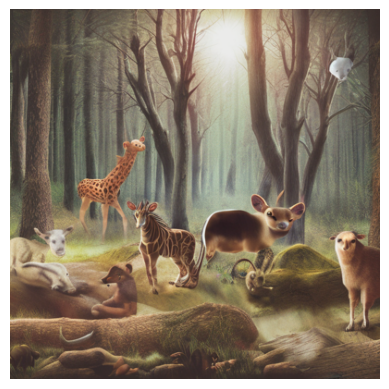

Generating audio...
 > Downloading model to /root/.local/share/tts/tts_models--en--ek1--tacotron2
100% 347M/347M [04:36<00:00, 1.26MiB/s]
 > Model's license - apache 2.0
 > Check https://choosealicense.com/licenses/apache-2.0/ for more info.
 > Downloading model to /root/.local/share/tts/vocoder_models--en--ek1--wavegrad
100% 190M/190M [00:38<00:00, 4.94MiB/s]
 > Model's license - apache 2.0
 > Check https://choosealicense.com/licenses/apache-2.0/ for more info.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:-10
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:0
 | > fft_size:1024
 | > power:1.8
 | > preemphasis:0.99
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > d

In [ ]:
# Generate and play audio

# Main function to generate both image and audio
def generate_media(prompt, audio_text):
    # Generate and display image
    print("Generating image...")
    image = generate_image(prompt, image_gen_model)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    print("Generating audio...")
    audio_path = "output.wav"
    generate_audio(audio_text, audio_path)

    # Load audio using soundfile instead of librosa
    x, sr = sf.read(audio_path)

    ipd.display(ipd.Audio(x, rate=sr))

# Example usage
image_prompt = audio_text =  "animals in forest"
#audio_text = "cheating in examhall"
generate_media(image_prompt, audio_text)